In [1]:
# pip install numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Penjelasan label (kolom **Churn**) :
- Klien akan berhenti berlangganan atau tidak :
    - No : akan berlangganan
    - Yes : berhenti berlangganan

In [4]:
df.drop(columns='CustomerID', inplace=True)

**Kolom CustomerID** kita drop karena tidak berpengaruh pada label

In [5]:
df.shape

(7043, 20)

Dimensi dataset ini yaitu **7.043 baris** dan **20 kolom**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Insight :
- **3 kolom numerikal**
- **17 kolom kategorikal**
- Terdapat kolom yang janggal yaitu TotalCharges yang seharusnya numerik tetapi bertipe objek

In [7]:
df.isna().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada NaN di dataset ini

In [8]:
df.duplicated().sum()

np.int64(22)

Terdapat 22 data duplikat di dataset ini

In [9]:
round(df.describe(), 2)

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


Insight :
- Kolom SeniorCitizen merupakan data biner

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Kita ubah kolom TotalCharges menjadi numerik

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [12]:
num_cols = df.select_dtypes('number')
cat_cols = df.select_dtypes('object')

Kita membagi dataset menjadi num_cols (numerikal) dan cat_cols (kategorikal) agar memudahkan visualisasi di tiap tipe data

In [13]:
for col in num_cols:
    print(f'Variansi kolom {col} : {round(num_cols[col].var(), 2)}\n')

Variansi kolom Tenure : 603.17

Variansi kolom MonthlyCharges : 905.41

Variansi kolom TotalCharges : 5138252.41



In [14]:
for col in num_cols:
    print(f'Range kolom {col} : {round(num_cols[col].max() - num_cols[col].min(), 2)}\n')

Range kolom Tenure : 72

Range kolom MonthlyCharges : 100.5

Range kolom TotalCharges : 8666.0



In [15]:
for col in num_cols:
    print(f'IQR kolom {col} : {round(num_cols[col].quantile(0.75) - num_cols[col].quantile(0.25), 2)}\n')

IQR kolom Tenure : 46.0

IQR kolom MonthlyCharges : 54.35

IQR kolom TotalCharges : 3393.29



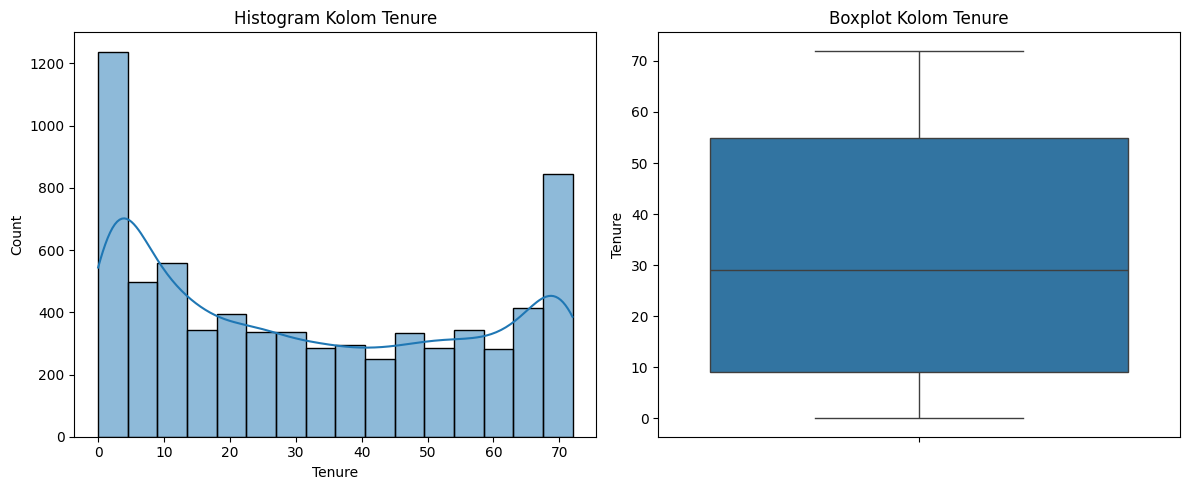

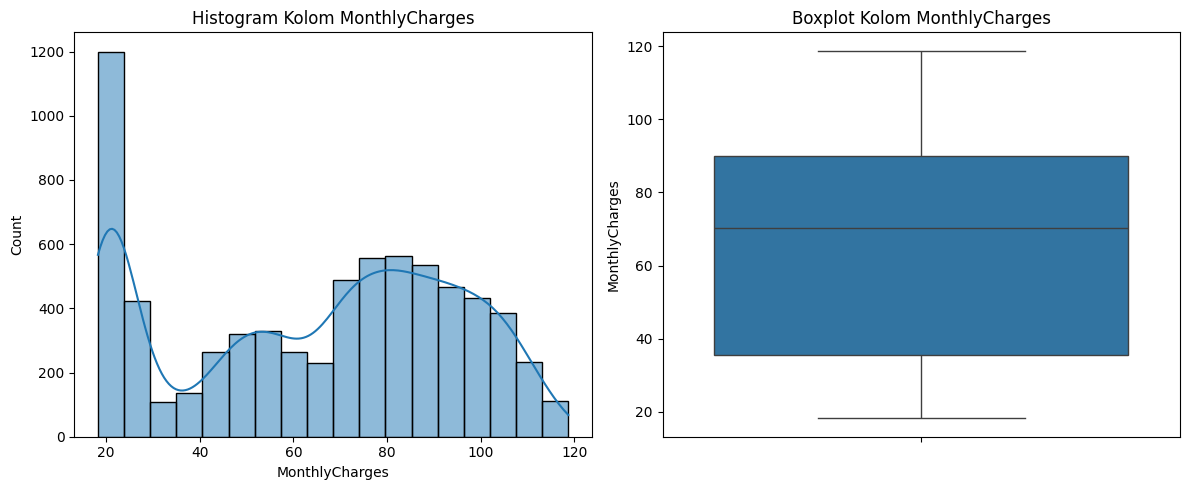

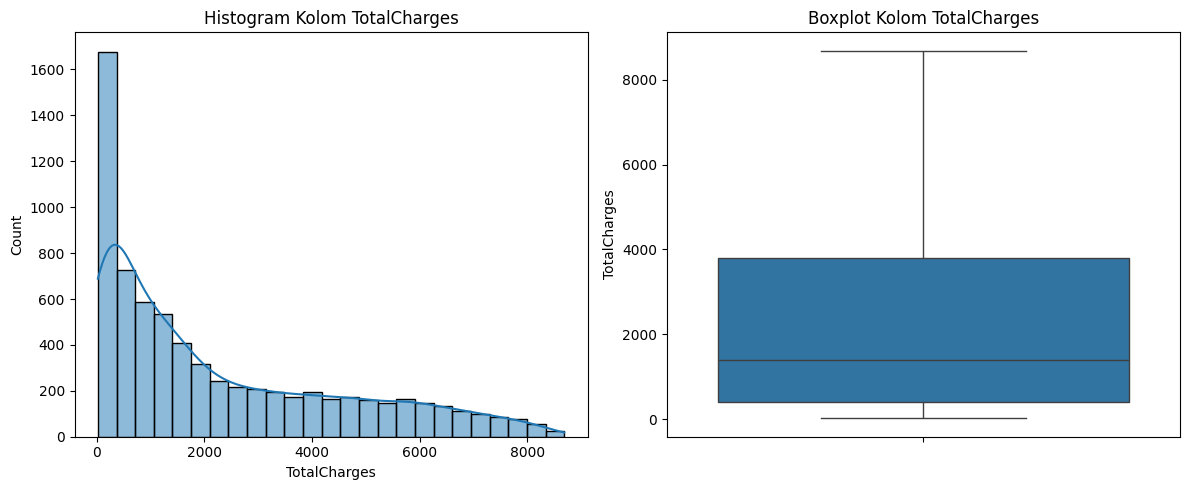

In [16]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(num_cols[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram Kolom {col}')
    sns.boxplot(num_cols[col], ax=axes[1])
    axes[1].set_title(f'Boxplot Kolom {col}')
    plt.tight_layout()
    plt.show()

Terdapat outlier di kolom SeniorCitizen yang di mana itu adalah nilai asli dari kolomnya sehingga masih belum bisa dipastikan kalau itu termasuk outlier

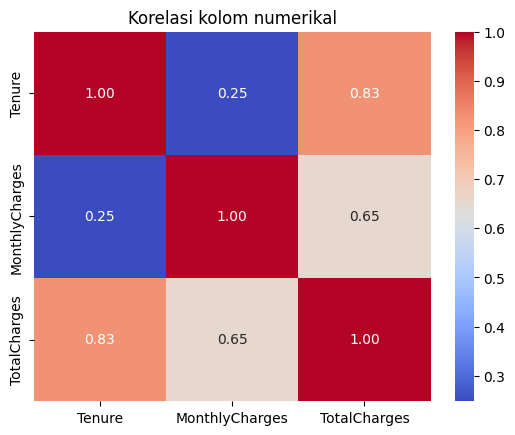

In [17]:
sns.heatmap(num_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi kolom numerikal')
plt.show()

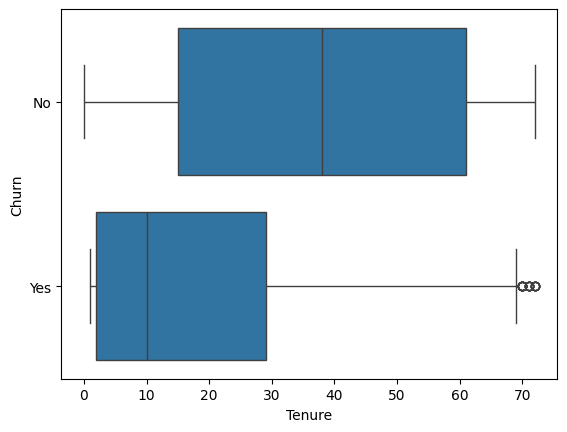

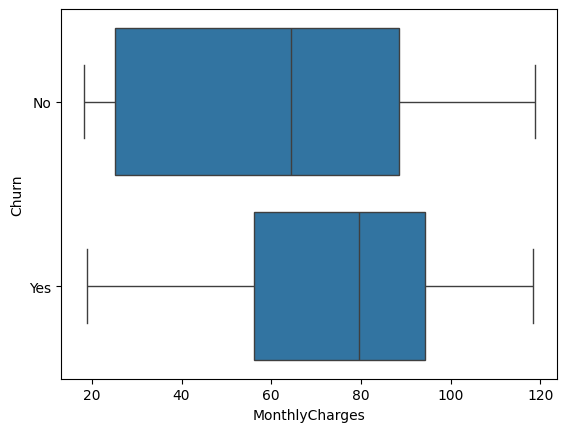

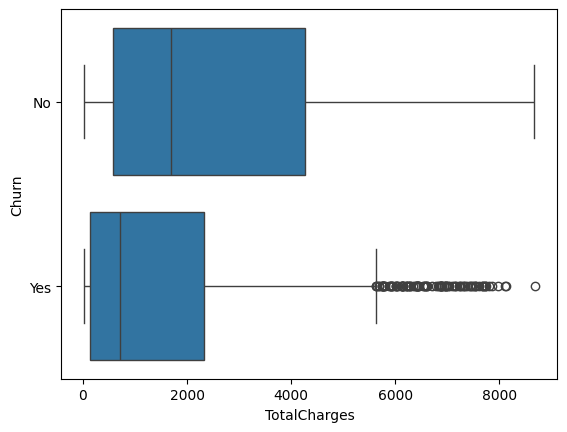

In [18]:
for col in df[['Churn', 'Tenure', 'MonthlyCharges', 'TotalCharges']]:
    if col != 'Churn':
        sns.boxplot(y='Churn', x=col, data=df)
        plt.show()

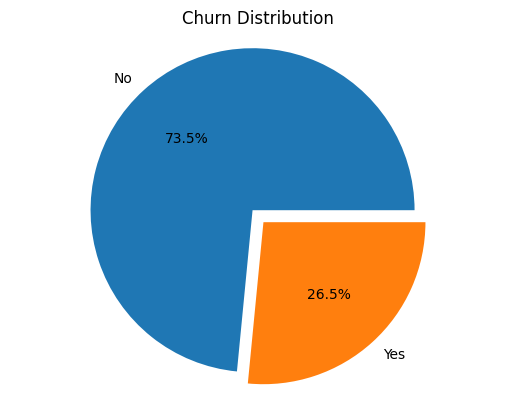

In [19]:
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%', explode = (0.1, 0))
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

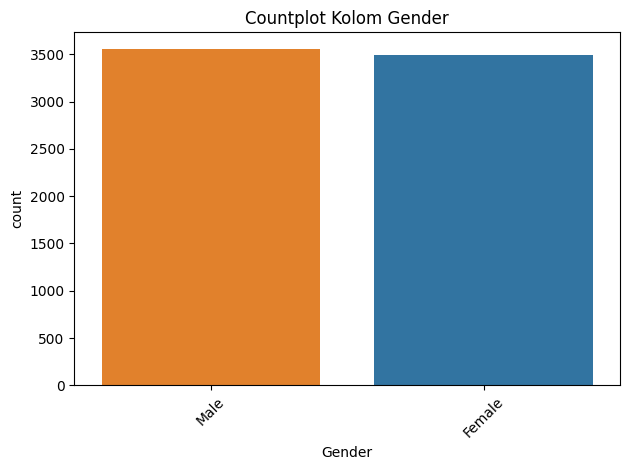

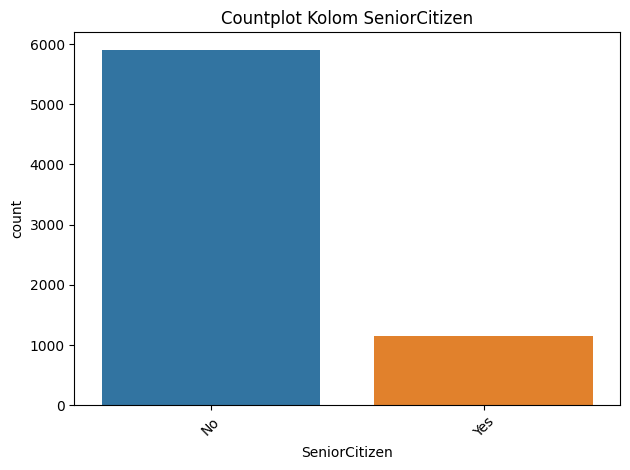

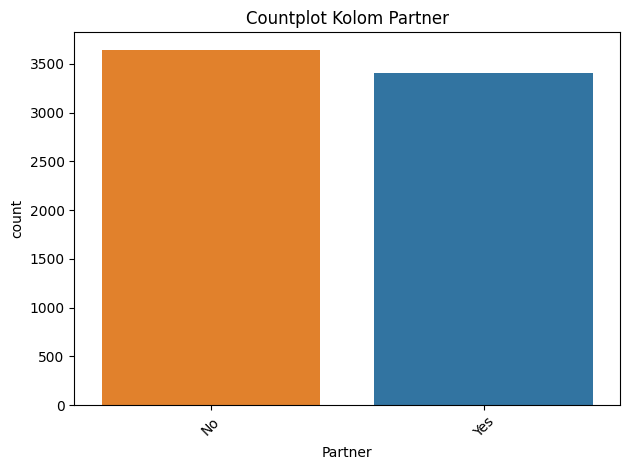

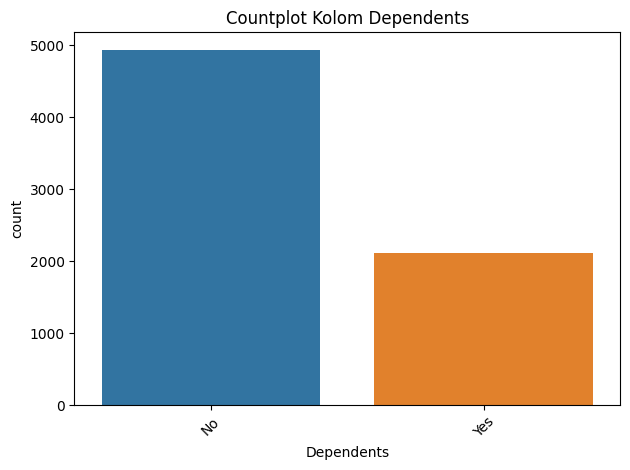

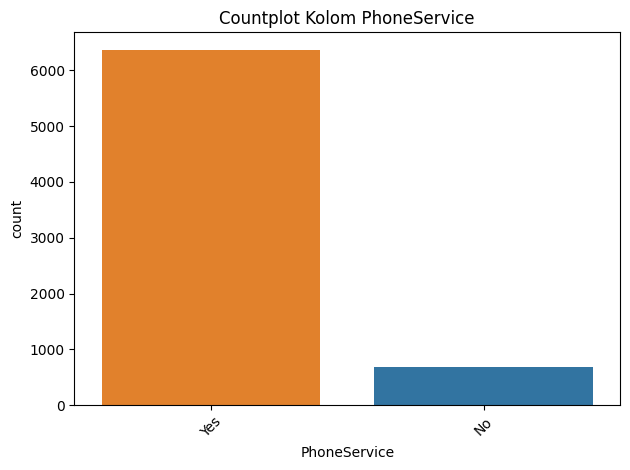

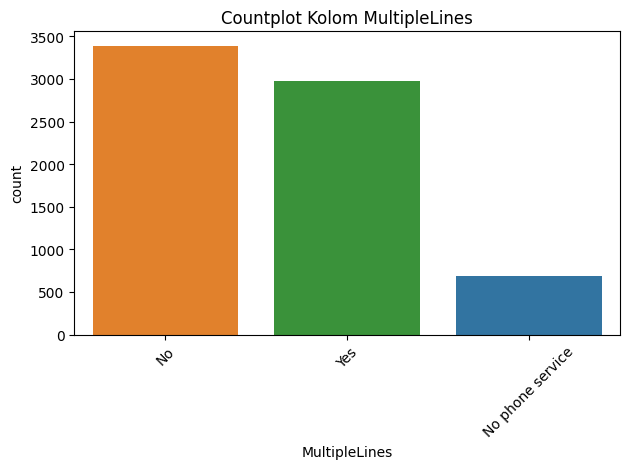

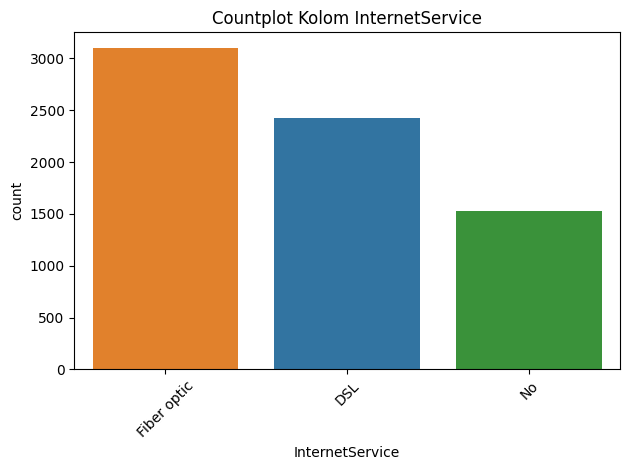

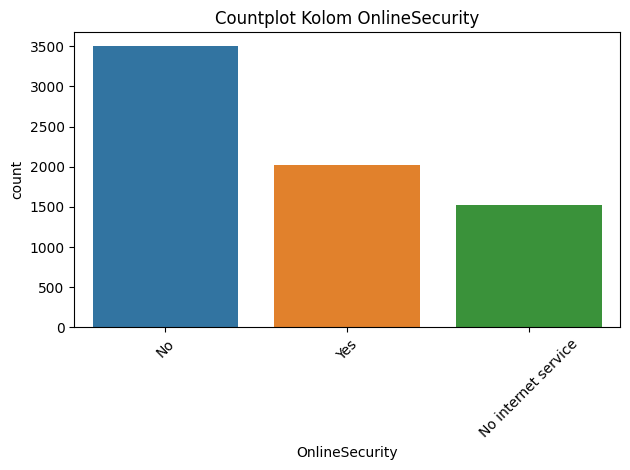

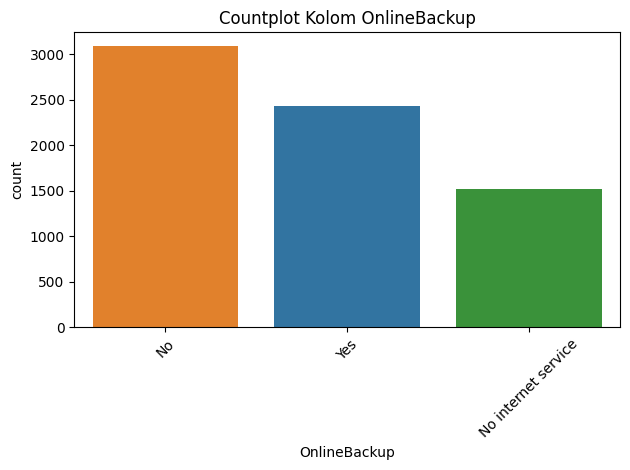

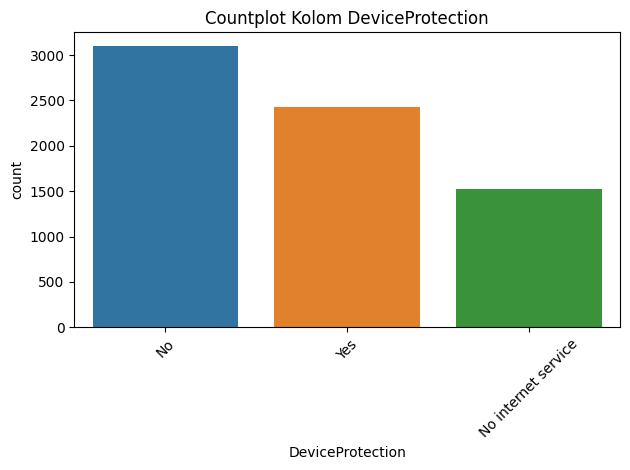

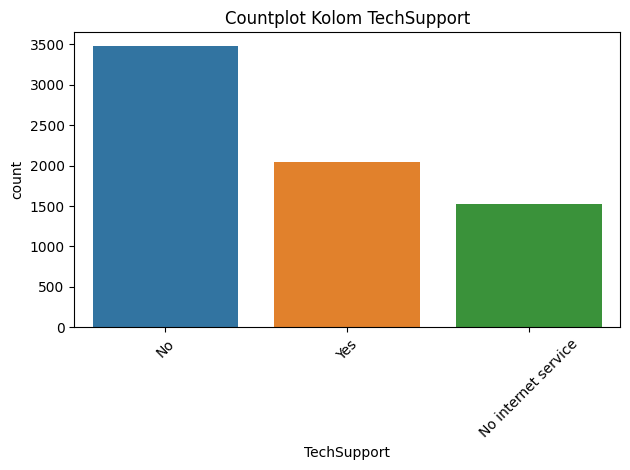

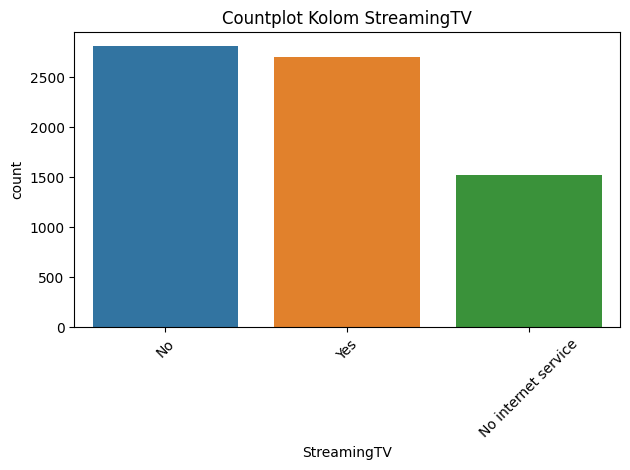

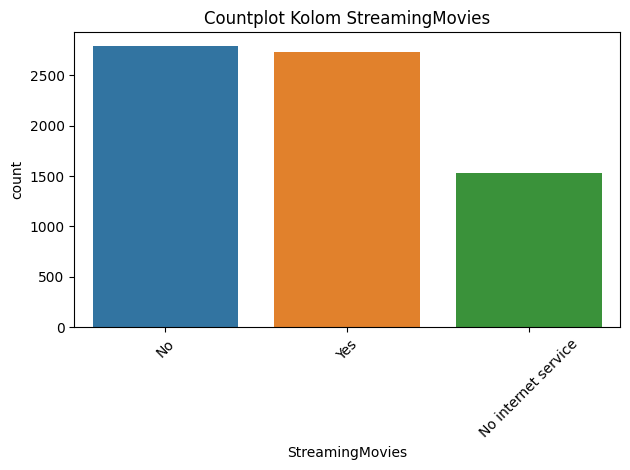

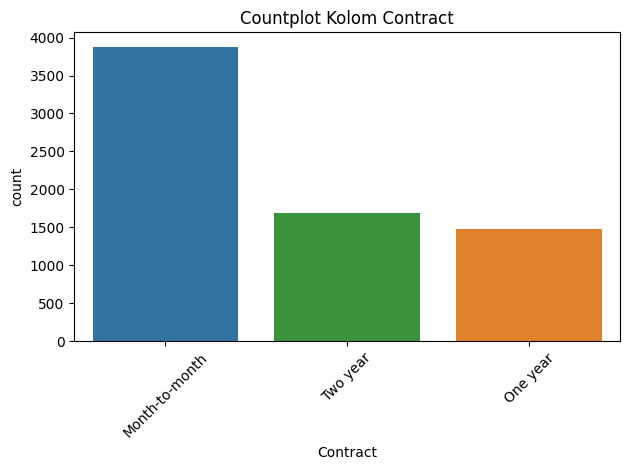

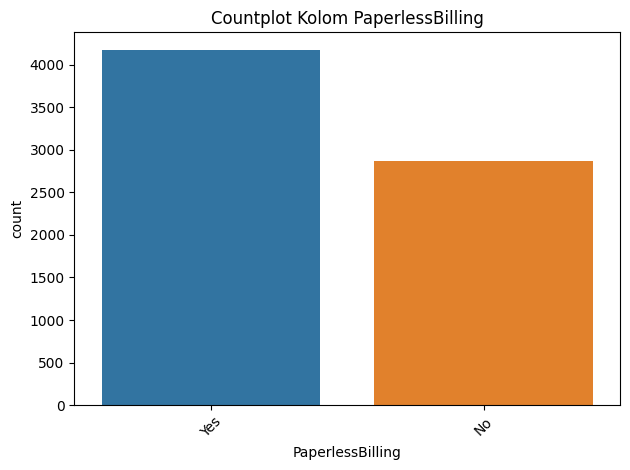

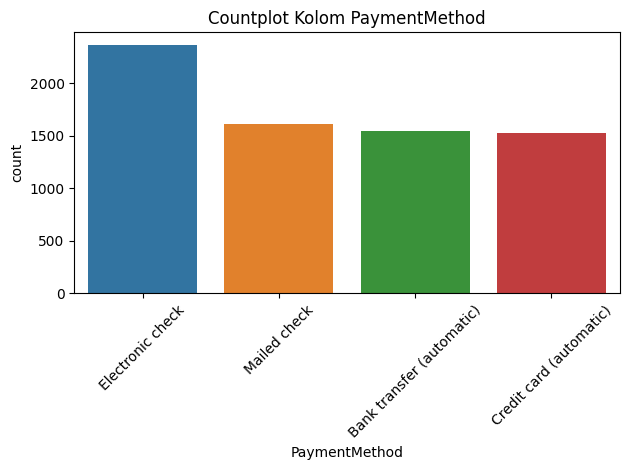

In [20]:
for col in cat_cols:
    if col != 'Churn':
        sns.countplot(data=cat_cols, x=col, hue=col, order=cat_cols[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Countplot Kolom {col}')
        plt.tight_layout()
        plt.show()

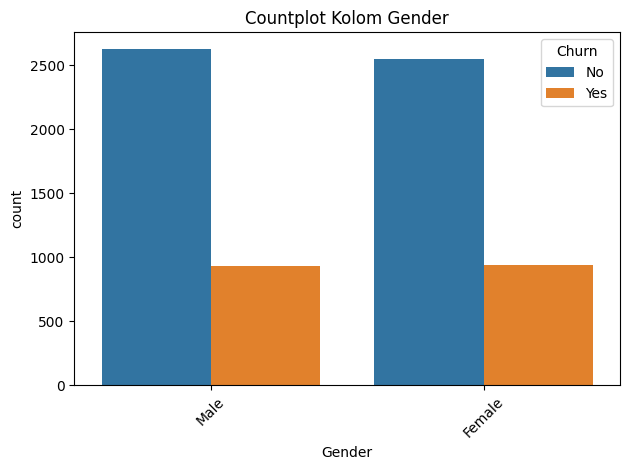

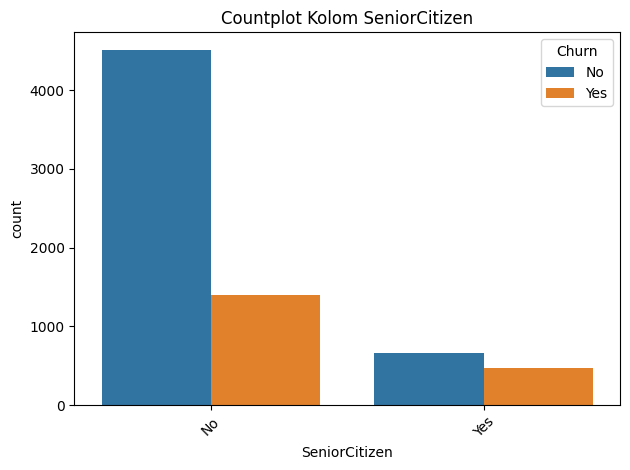

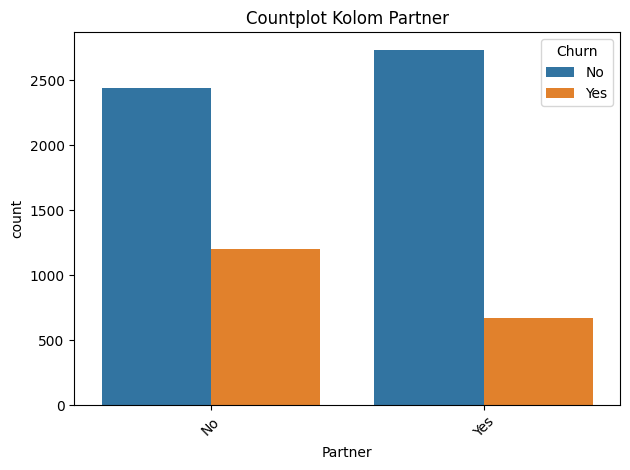

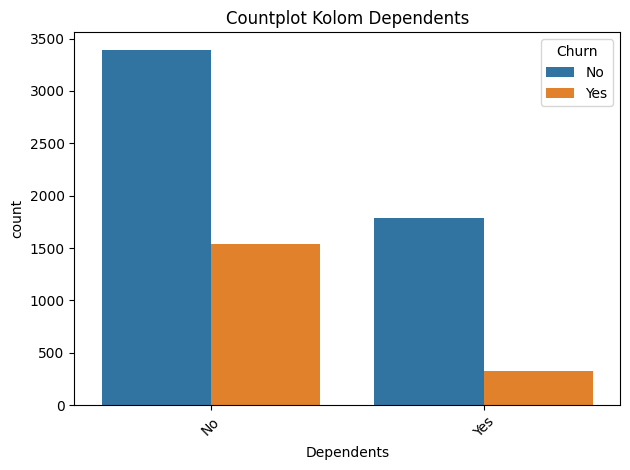

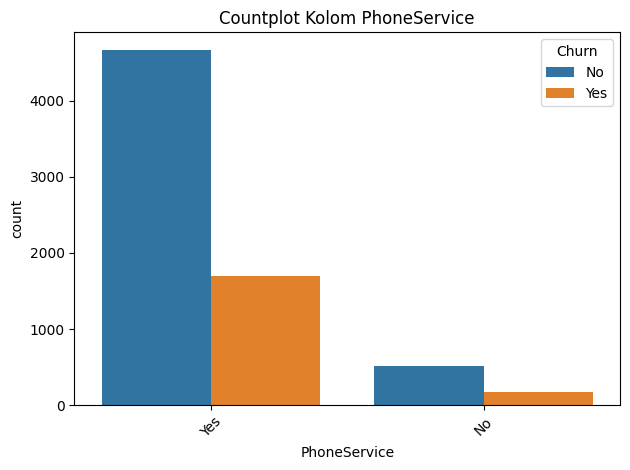

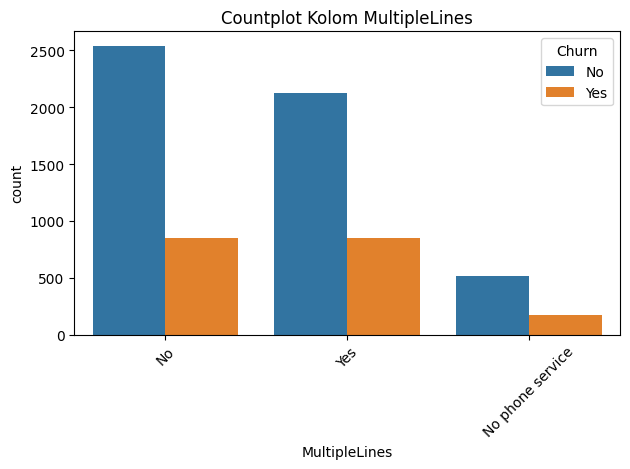

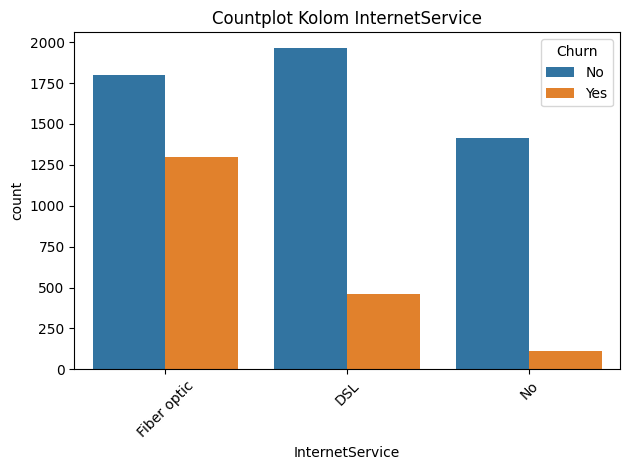

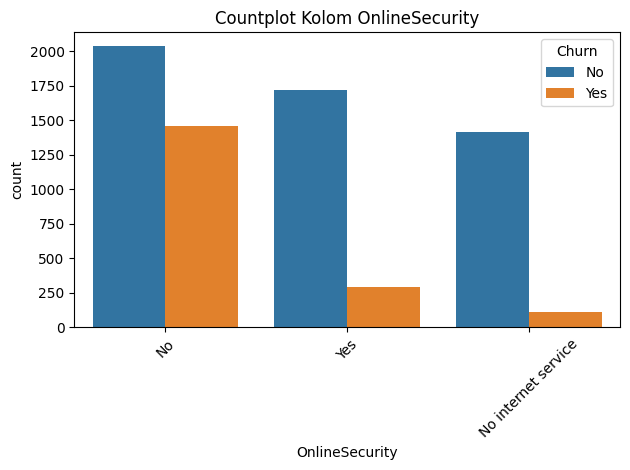

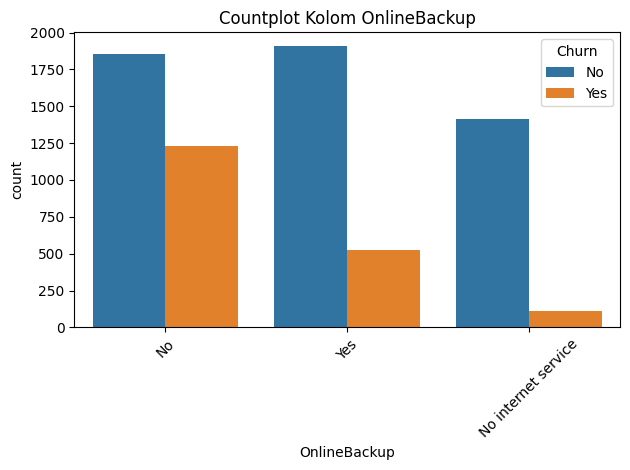

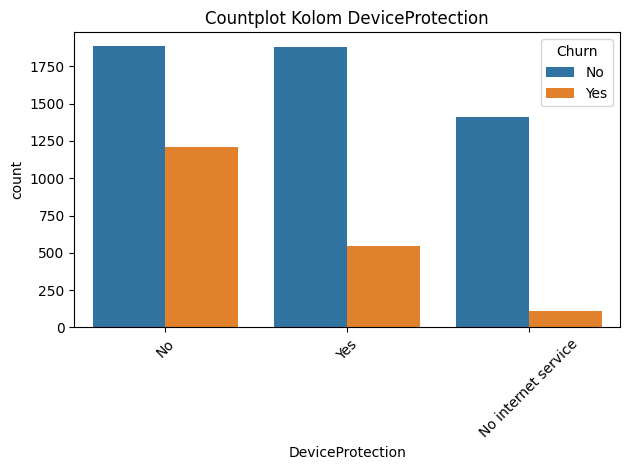

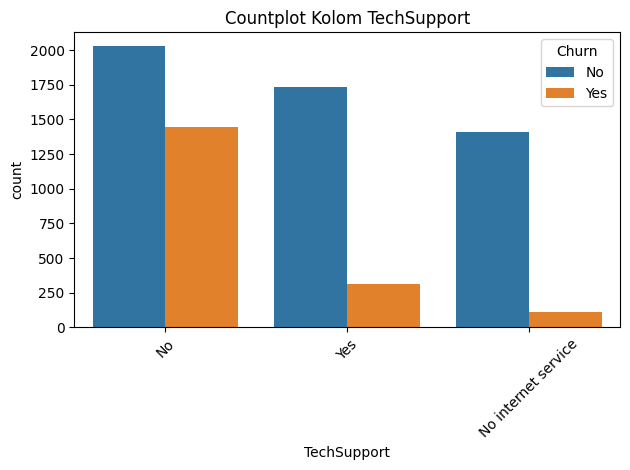

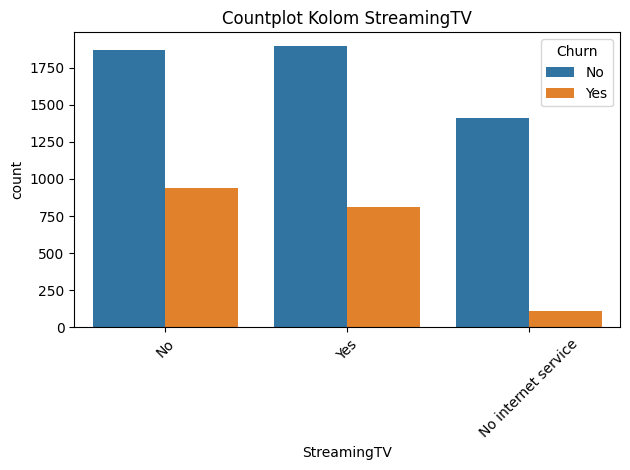

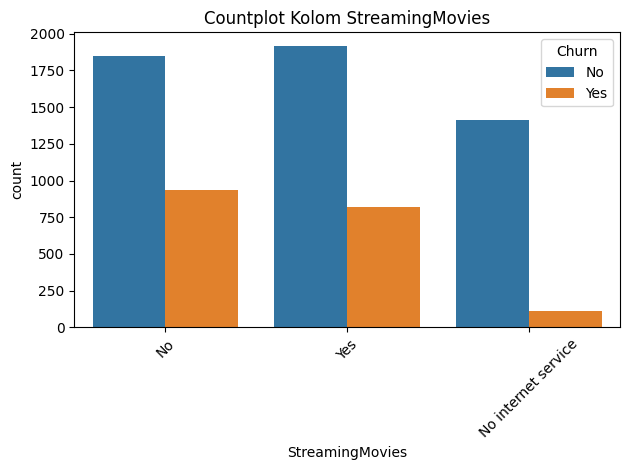

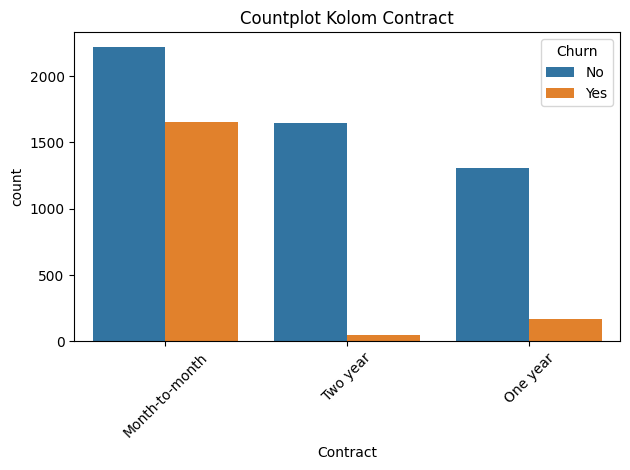

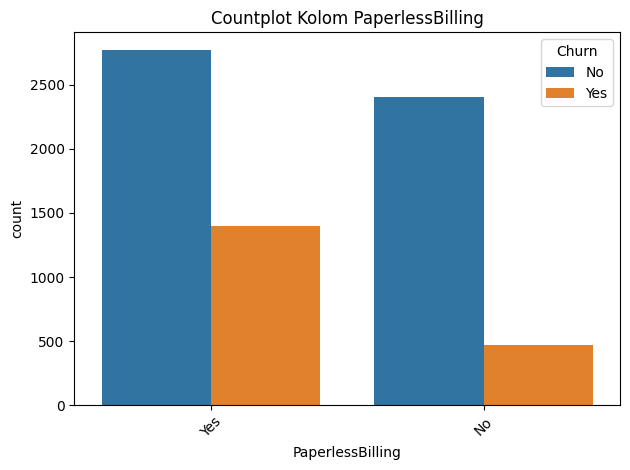

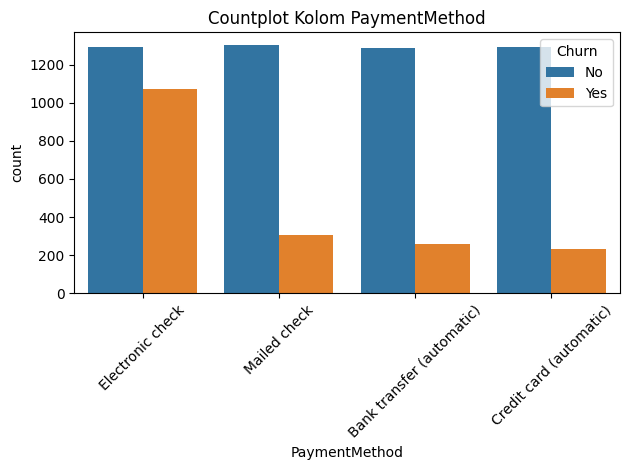

In [21]:
for col in cat_cols:
    if col != 'Churn':
        sns.countplot(data=cat_cols, x=col, hue='Churn', order=cat_cols[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Countplot Kolom {col}')
        plt.tight_layout()
        plt.show()

In [22]:
df.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [24]:
df.duplicated().sum()

np.int64(22)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
mappings = {}
for col in df.select_dtypes('object').columns:
    mappings[col] = {k: v for k, v in zip(df[col].unique(), range(len(df[col].unique())))}
    df[col] = df[col].map(mappings[col])

mappings

{'Gender': {'Female': 0, 'Male': 1},
 'SeniorCitizen': {'No': 0, 'Yes': 1},
 'Partner': {'Yes': 0, 'No': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'OnlineBackup': {'Yes': 0, 'No': 1, 'No internet service': 2},
 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'Yes': 0, 'No': 1},
 'PaymentMethod': {'Electronic check': 0,
  'Mailed check': 1,
  'Bank transfer (automatic)': 2,
  'Credit card (automatic)': 3},
 'Churn': {'No': 0, 'Yes': 1}}

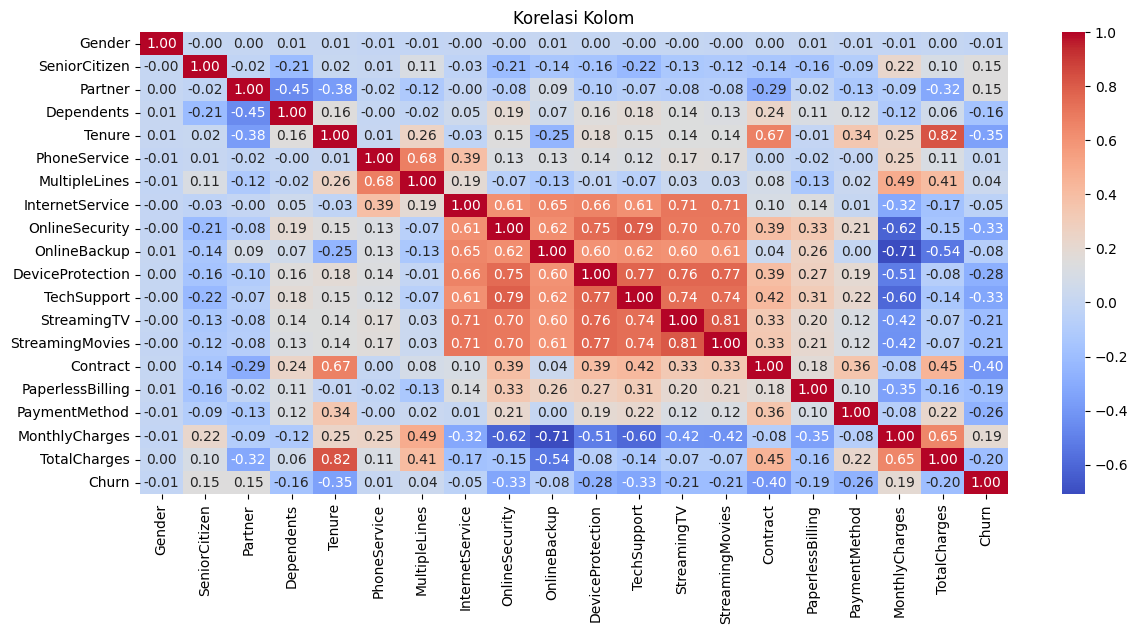

In [27]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Kolom')
plt.show()

In [28]:
x = df.drop(columns='Churn')
y = df['Churn']

In [29]:
def strat_split(x, y, test_size=0.2, stratify=None, random_state=42):
    stratify = stratify if stratify is not None else y
    np.random.seed(random_state)
    x = np.array(x)
    y = np.array(y)
    stratify = np.array(stratify)
    unique_classes, y_indices = np.unique(stratify, return_inverse=True)
    test_indices = []
    train_indices = []
    for class_index in range(len(unique_classes)):
        class_indices = np.where(y_indices == class_index)[0]
        np.random.shuffle(class_indices)
        n_test = int(len(class_indices) * test_size)
        test_indices.extend(class_indices[:n_test])
        train_indices.extend(class_indices[n_test:])

    test_indices = np.array(test_indices)
    train_indices = np.array(train_indices)
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = strat_split(x, y, test_size=0.2, stratify=y)

In [30]:
def normalisasi(train, test):
    min_val = np.min(train, axis=0)
    max_val = np.max(train, axis=0)
    denominator = max_val - min_val
    denominator[denominator == 0] += 1e-10
    train_scaled = (train - min_val) / denominator
    test_scaled = (test - min_val) / denominator

    return train_scaled, test_scaled

x_train_scaled, x_test_scaled = normalisasi(x_train, x_test)

In [31]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

class KNearestNeighbours:
    def __init__(self, n_neighbors=5, metric='euclidean', p=3):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            predictions.append(self._predict(x))
        return np.array(predictions)
    
    def _predict(self, x):
        distances = np.array([self._distance(x, x_train) for x_train in self.X_train])
        k_indices = np.argpartition(distances, self.n_neighbors)[:self.n_neighbors]
        k_nearest_labels = self.y_train[k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common
    
    def _distance(self, a, b):
        if self.metric == 'euclidean':
            return euclidean_distance(a, b)
        elif self.metric == 'manhattan':
            return manhattan_distance(a, b)
        elif self.metric == 'minkowski':
            return minkowski_distance(a, b, self.p)
        else:
            raise ValueError(f"Unknown metric: {self.metric}")

In [32]:
def cross_val(knn, X, y, cv=5):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_sizes = np.full(cv, X.shape[0] // cv, dtype=int)
    fold_sizes[:X.shape[0] % cv] += 1
    current = 0
    scores = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        current = stop

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        scores.append(accuracy)

    return np.array(scores)

In [33]:
def grid_search_knn(X_train, y_train, param_grid, cv=5):
    best_score = 0
    best_params = None
    for n_neighbors in param_grid['n_neighbors']:
        for metric in param_grid['metric']:
            for p in param_grid.get('p', [3]):
                knn = KNearestNeighbours(n_neighbors=n_neighbors, metric=metric, p=p)
                scores = cross_val(knn, X_train, y_train, cv=cv)
                mean_score = scores.mean()
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'n_neighbors': n_neighbors, 'metric': metric, 'p': p}
    return best_params, best_score

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3, 4, 5] 
}

In [34]:
best_params, best_score = grid_search_knn(x_train_scaled, y_train, param_grid, cv=5)
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score:.4f}')

In [ ]:
knn = KNearestNeighbours(**best_params)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)